<a href="https://colab.research.google.com/github/pamoAZ/Modulo1_ciencia_de_datos/blob/main/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
#model_selection Este módulo incluye utilidades para dividir conjuntos de datos en subconjuntos de
#entrenamiento y prueba, realizar validación cruzada y ajustar hiperparámetros de modelos.
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split
#La función train_test_split se utiliza para dividir los datos en un conjunto de entrenamiento y un
#conjunto de prueba, que son esenciales para evaluar el rendimiento del modelo en datos no vistos.

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

In [3]:
archivo_excel = "//content/Electric_Vehicle_Population_Data.csv"
launch_data = pd.read_csv(archivo_excel)
launch_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df = pd.read_csv(archivo_excel)

# Obtiene el número de filas y columnas
num_filas = df.shape[0]
num_columnas = df.shape[1]

print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 173533
Número de columnas: 17


In [5]:
import pandas as pd


# Carga el archivo CSV
archivo_csv = '/content/Electric_Vehicle_Population_Data.csv'  # Reemplaza con la ruta de tu archivo
df = pd.read_csv(archivo_csv)

# Verificar valores nulos en el DataFrame
valores_nulos = df.isnull().sum()

# Verificar si hay filas completas que son nulas
filas_nulas_completas = df.isnull().all(axis=1).sum()

# Verificar si hay columnas completas que son nulas
columnas_nulas_completas = df.isnull().all(axis=0).sum()

# Mostrar los resultados
print("Valores nulos por columna:")
print(valores_nulos)
print(f"\nNúmero de filas completas nulas: {filas_nulas_completas}")
print(f"Número de columnas completas nulas: {columnas_nulas_completas}")


Valores nulos por columna:
VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 376
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtyp

In [15]:
# Manejar los valores nulos por columnas específicas

# Para columnas categóricas: Reemplazar con la categoría más frecuente (moda)
for columna in ['County', 'City', 'State', 'Postal Code', 'Electric Vehicle Type',
                'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility',"Vehicle Location"]:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)

# Para columnas numéricas: Reemplazar con la media o mediana
# Reemplazar 'Electric Range' con la mediana para evitar la influencia de los valores atípicos
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)

# Reemplazar 'Base MSRP' con 0 puede no ser lo ideal si estás analizando precios.
# Considera usar la mediana o media si se ajusta mejor a tu análisis.
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)

# Para 'Legislative District' puede que desees dejar los valores nulos como están,
# o reemplazarlos con un valor específico si ese valor tiene un significado dentro de tu análisis
df['Legislative District'].fillna(-1, inplace=True)  # O cualquier otro valor que tenga sentido

# '2020 Census Tract' podría ser tratado de la misma manera que 'Legislative District'
df['2020 Census Tract'].fillna(-1, inplace=True)  # O cualquier otro valor que tenga sentido

# Imprimir DataFrame para verificar los cambios
df_new= df
print(df_new)

        VIN (1-10)     County          City State  Postal Code  Model Year  \
0       5UXKT0C59G     Yakima        Zillah    WA      98953.0        2016   
1       5YJ3E1EA2J  Snohomish       Edmonds    WA      98020.0        2018   
2       1G1RE6E4XE     Kitsap  Port Orchard    WA      98367.0        2014   
3       2C4RC1L76M     Skagit           Bow    WA      98232.0        2021   
4       5YJ3E1EA2J   Thurston       Olympia    WA      98513.0        2018   
...            ...        ...           ...   ...          ...         ...   
173528  5YJ3E1EA0P       King       Redmond    WA      98052.0        2023   
173529  5YJXCBE22H  Snohomish     Snohomish    WA      98296.0        2017   
173530  1C4RJXR65R       King          Kent    WA      98031.0        2024   
173531  5UXKT0C50G       King       Seattle    WA      98199.0        2016   
173532  5YJSA1E5XM       King       Seattle    WA      98117.0        2021   

             Make     Model                   Electric Vehicle 

In [16]:
import pandas as pd

# Supongamos que este es el DataFrame después de haber realizado la imputación de valores nulos
# Tendrás que cargar tu DataFrame aquí de nuevo si no lo has hecho después de la imputación
df = df_new  # Asegúrate de usar la ruta correcta a tu archivo

# Verificar valores nulos en el DataFrame después de la imputación
valores_nulos_despues_imputacion = df.isnull().sum()

# Imprimir los resultados para verificar si aún hay valores nulos
print("Valores nulos después de la imputación:")
print(valores_nulos_despues_imputacion)

# Para confirmar que realmente no hay más valores nulos, podemos usar 'any()'
hay_valores_nulos = valores_nulos_despues_imputacion.any()

# Imprimir el resultado de la comprobación
print("\n¿Hay aún valores nulos en el DataFrame después de la imputación?:", hay_valores_nulos)


Valores nulos después de la imputación:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

¿Hay aún va

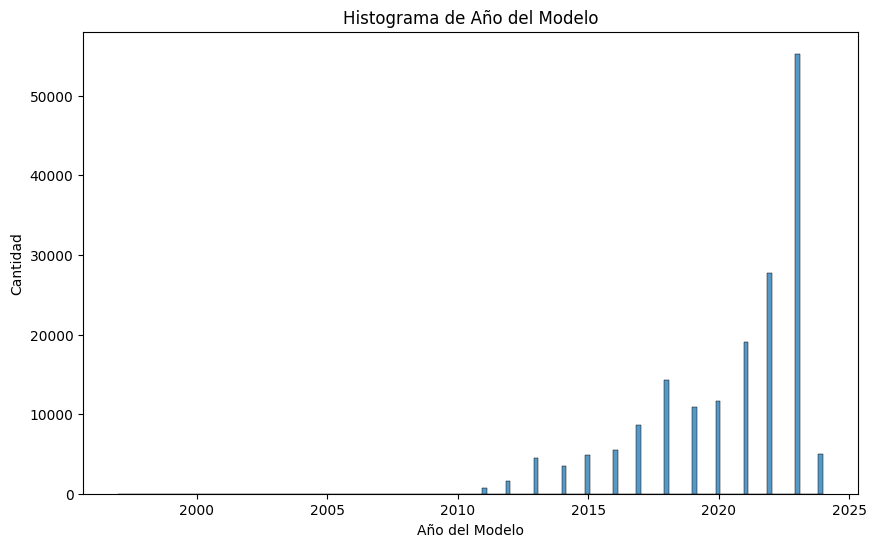

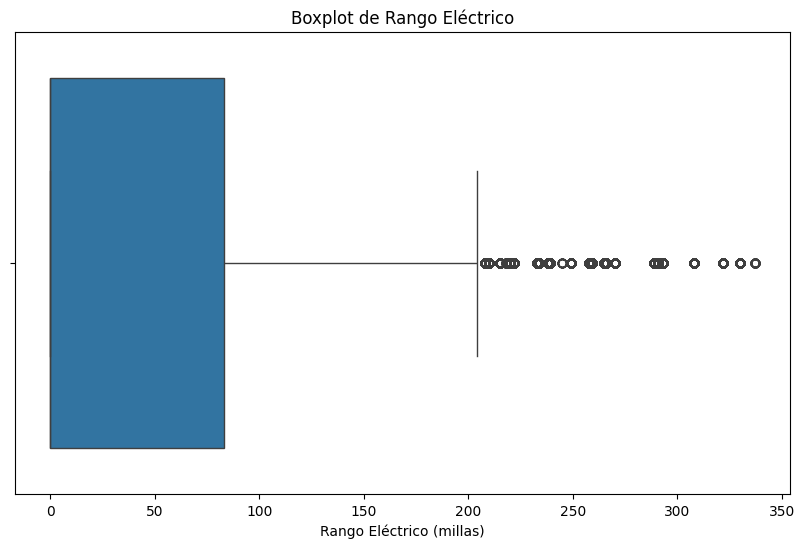

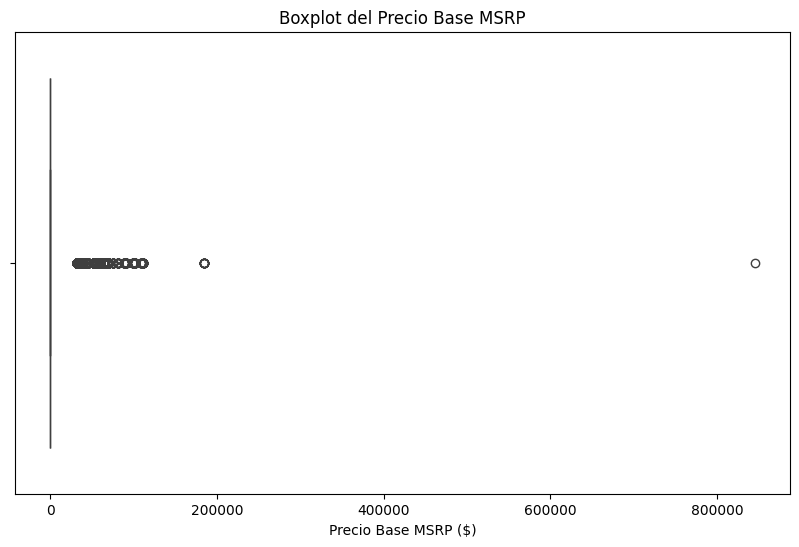

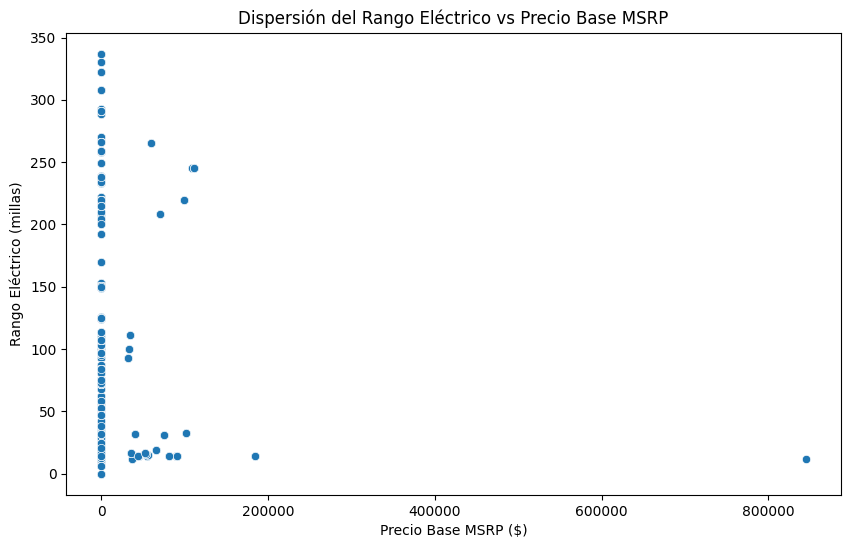

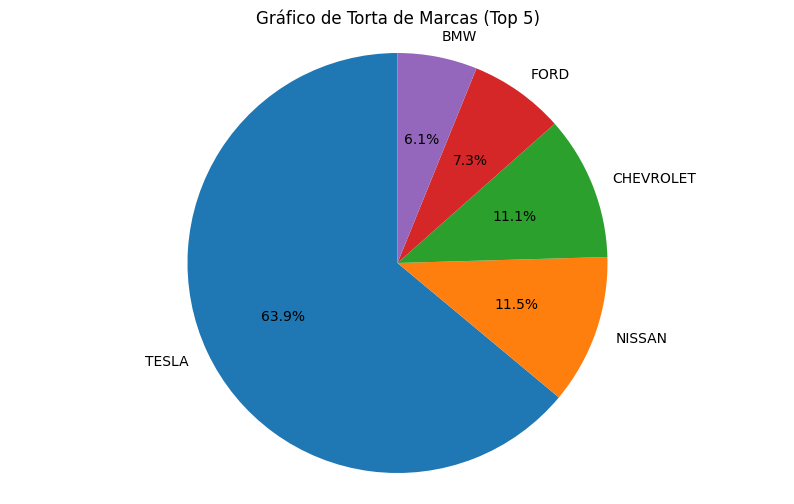

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponemos que tienes un DataFrame llamado df que ya está cargado y limpio.
# Si necesitas cargar tus datos, asegúrate de descomentar y ajustar la línea de pd.read_csv a continuación.
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Definir el tamaño común de las figuras
plt.rcParams['figure.figsize'] = (10, 6)

# Histograma para 'Model Year'
plt.figure()
sns.histplot(df['Model Year'], kde=False)
plt.title('Histograma de Año del Modelo')
plt.xlabel('Año del Modelo')
plt.ylabel('Cantidad')
plt.show()

# Boxplot para 'Electric Range'
plt.figure()
sns.boxplot(x=df['Electric Range'])
plt.title('Boxplot de Rango Eléctrico')
plt.xlabel('Rango Eléctrico (millas)')
plt.show()

# Polar Boxplot para 'Base MSRP'
# Nota: Los boxplots polares no son una funcionalidad directa de seaborn o matplotlib,
# así que en su lugar se puede hacer un boxplot regular para 'Base MSRP'.
plt.figure()
sns.boxplot(x=df['Base MSRP'])
plt.title('Boxplot del Precio Base MSRP')
plt.xlabel('Precio Base MSRP ($)')
plt.show()

# Diagrama de dispersión para 'Electric Range' vs 'Base MSRP'
plt.figure()
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Dispersión del Rango Eléctrico vs Precio Base MSRP')
plt.xlabel('Precio Base MSRP ($)')
plt.ylabel('Rango Eléctrico (millas)')
plt.show()

# Gráfico de torta para 'Make' (suponiendo que es una columna numérica como un código de marca)
# Esto es inusual ya que los gráficos de torta generalmente representan categorías, pero si se tiene un conteo numérico,
# se puede representar de la siguiente manera.
make_counts = df['Make'].value_counts().head(5)  # Tomamos las 5 marcas más frecuentes
plt.figure()
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Esto asegura que el gráfico de pie sea un círculo
plt.title('Gráfico de Torta de Marcas (Top 5)')
plt.show()

In [18]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Establecer una semilla para reproducibilidad
seed = 42

# Determinar el tamaño de las muestras
tamaño_total = len(df_new)
muestra_30 = int(0.3 * tamaño_total)
muestra_60 = int(0.6 * tamaño_total)
muestra_90 = int(0.9 * tamaño_total)

# Seleccionar muestras aleatorias para 'Electric Range'
muestra_electric_range_30 = df['Electric Range'].sample(n=muestra_30, random_state=seed)
muestra_electric_range_60 = df['Electric Range'].sample(n=muestra_60, random_state=seed)
muestra_electric_range_90 = df['Electric Range'].sample(n=muestra_90, random_state=seed)

# Seleccionar muestras aleatorias para 'Base MSRP'
muestra_base_msrp_30 = df['Base MSRP'].sample(n=muestra_30, random_state=seed)
muestra_base_msrp_60 = df['Base MSRP'].sample(n=muestra_60, random_state=seed)
muestra_base_msrp_90 = df['Base MSRP'].sample(n=muestra_90, random_state=seed)

# Mostrar las muestras
print("Muestras de 'Electric Range' para 30%, 60%, 90% del conjunto de datos:")
print(muestra_electric_range_30.head())
print(muestra_electric_range_60.head())
print(muestra_electric_range_90.head())

print("\nMuestras de 'Base MSRP' para 30%, 60%, 90% del conjunto de datos:")
print(muestra_base_msrp_30.head())
print(muestra_base_msrp_60.head())
print(muestra_base_msrp_90.head())


Muestras de 'Electric Range' para 30%, 60%, 90% del conjunto de datos:
106317     22.0
88156      53.0
61959     215.0
38676       0.0
163520      0.0
Name: Electric Range, dtype: float64
106317     22.0
88156      53.0
61959     215.0
38676       0.0
163520      0.0
Name: Electric Range, dtype: float64
106317     22.0
88156      53.0
61959     215.0
38676       0.0
163520      0.0
Name: Electric Range, dtype: float64

Muestras de 'Base MSRP' para 30%, 60%, 90% del conjunto de datos:
106317    0.0
88156     0.0
61959     0.0
38676     0.0
163520    0.0
Name: Base MSRP, dtype: float64
106317    0.0
88156     0.0
61959     0.0
38676     0.0
163520    0.0
Name: Base MSRP, dtype: float64
106317    0.0
88156     0.0
61959     0.0
38676     0.0
163520    0.0
Name: Base MSRP, dtype: float64


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Prueba de Shapiro-Wilk para 'Electric Range' (30% de la muestra): p-valor = 0.0
Prueba de Shapiro-Wilk para 'Base MSRP' (30% de la muestra): p-valor = 0.0


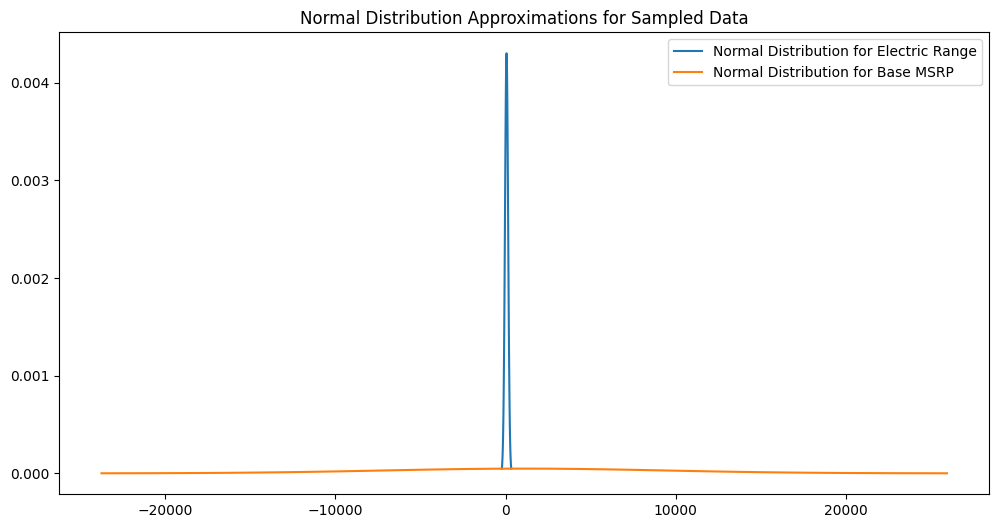

In [19]:
import scipy.stats as stats

# Asumimos que ya has generado tus muestras como se mostró en el ejemplo anterior
# Por ejemplo, tenemos `muestra_electric_range_30`, `muestra_base_msrp_30`, etc.

# Realizar la prueba de Shapiro-Wilk para probar la normalidad
# Hacemos la prueba para la muestra de 30% como ejemplo
shapiro_test_er_30 = stats.shapiro(muestra_electric_range_30)
shapiro_test_msrp_30 = stats.shapiro(muestra_base_msrp_30)

print(f"Prueba de Shapiro-Wilk para 'Electric Range' (30% de la muestra): p-valor = {shapiro_test_er_30.pvalue}")
print(f"Prueba de Shapiro-Wilk para 'Base MSRP' (30% de la muestra): p-valor = {shapiro_test_msrp_30.pvalue}")

# Para este ejemplo, usaremos una distribución normal para la ilustración
# pero deberías decidir basado en los p-valores y el tamaño de la muestra.
mean_er_30 = muestra_electric_range_30.mean()
std_er_30 = muestra_electric_range_30.std(ddof=1)  # ddof=1 para la muestra

mean_msrp_30 = muestra_base_msrp_30.mean()
std_msrp_30 = muestra_base_msrp_30.std(ddof=1)

# Creamos un rango de valores para la distribución normal
values_er = np.linspace(mean_er_30 - 3*std_er_30, mean_er_30 + 3*std_er_30, 100)
values_msrp = np.linspace(mean_msrp_30 - 3*std_msrp_30, mean_msrp_30 + 3*std_msrp_30, 100)

# Calcular la pdf de la distribución normal
pdf_er = stats.norm.pdf(values_er, mean_er_30, std_er_30)
pdf_msrp = stats.norm.pdf(values_msrp, mean_msrp_30, std_msrp_30)

# Graficar la distribución normal
plt.figure(figsize=(12, 6))
plt.plot(values_er, pdf_er, label='Normal Distribution for Electric Range')
plt.plot(values_msrp, pdf_msrp, label='Normal Distribution for Base MSRP')
plt.legend()
plt.title('Normal Distribution Approximations for Sampled Data')
plt.show()
